In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [2]:
# Let's define the purpose of this project
# The idea is to create an estimator based on the current investments, savings rate, and time period
# The standard assumptions are monthly reinvestments and 7% return rate on the investments

In [90]:
# TODO: add the correct numbers in the cell below

In [91]:
initial = 0
time_in_years = 20
monthly = 1000

In [92]:
# the dictionaries to hold the tuples of values to plot
dictionary_of_totals = {}
dictionary_of_monthly_returns = {}

In [93]:
total = initial
for i in range (1, time_in_years * 12 + 1): # 120 for 10 years of investments
    total += total * 7/12 / 100 # assuming a 7% return rate, a typical avg for the stock market
    total += monthly
    #print('During month', i, 'the investment balance is:', f"${total:,.2f}")
    if i % 12 == 0:
        print('At the end of the year', i // 12, 'the investment balance is:', f"${total:,.2f}")
        dictionary_of_totals[i] = total    
        dictionary_of_monthly_returns[i] = total * 0.04 / 12 # monthly "safe withdrawal rate"

At the end of the year 1 the investment balance is: $12,392.59
At the end of the year 2 the investment balance is: $25,681.03
At the end of the year 3 the investment balance is: $39,930.10
At the end of the year 4 the investment balance is: $55,209.24
At the end of the year 5 the investment balance is: $71,592.90
At the end of the year 6 the investment balance is: $89,160.94
At the end of the year 7 the investment balance is: $107,998.98
At the end of the year 8 the investment balance is: $128,198.82
At the end of the year 9 the investment balance is: $149,858.91
At the end of the year 10 the investment balance is: $173,084.81
At the end of the year 11 the investment balance is: $197,989.71
At the end of the year 12 the investment balance is: $224,694.98
At the end of the year 13 the investment balance is: $253,330.79
At the end of the year 14 the investment balance is: $284,036.68
At the end of the year 15 the investment balance is: $316,962.30
At the end of the year 16 the investment

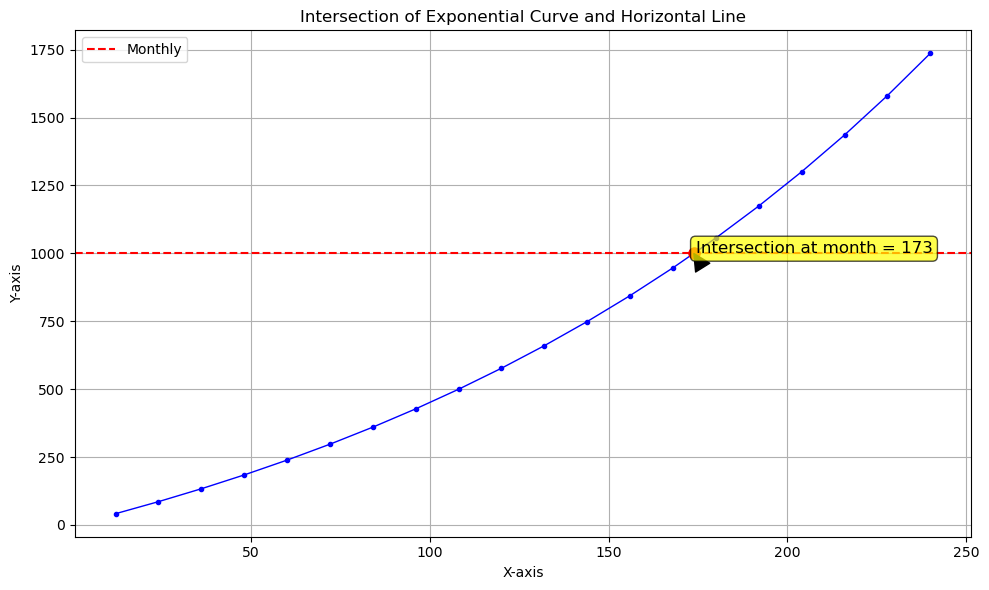

In [94]:
# add a graph of the investment value by years
x_values = list(dictionary_of_totals.keys())
y_values = list(dictionary_of_totals.values())

x_values_monthly = list(dictionary_of_monthly_returns.keys())
y_values_monthly = list(dictionary_of_monthly_returns.values())

# Create the plot of total values
#plt.figure(figsize=(10, 6))
#plt.plot(x_values, y_values, 'bo-', linewidth=1, markersize=3)  # Blue line with circle markers

# create the plot of monthly returns
plt.figure(figsize=(10, 6))
plt.axhline(y=monthly, color='red', linestyle='--', label='Monthly')
plt.plot(x_values_monthly, y_values_monthly, 'bo-', linewidth=1, markersize=3)  # Blue line with circle markers

# TODO:
# Create an interpolation function for the exponential curve
f = interpolate.interp1d(x_values_monthly, y_values_monthly, kind='linear', fill_value="extrapolate")

# Find where the difference between the curves is approximately zero
def find_intersection(x_min, x_max):
    def func(x):
        return f(x) - monthly
    
    # Binary search to find where func(x) changes sign
    while x_max - x_min > 0.001:  # Precision of 0.001
        mid = (x_min + x_max) / 2
        if func(x_min) * func(mid) <= 0:
            x_max = mid
        else:
            x_min = mid
    return (x_min + x_max) / 2

# Find intersection within the range of x_values_monthly
x_intersect = None
for i in range(len(x_values_monthly) - 1):
    if (y_values_monthly[i] - monthly) * (y_values_monthly[i+1] - monthly) <= 0:
        # Intersection is between these points
        x_intersect = find_intersection(x_values_monthly[i], x_values_monthly[i+1])
        break

# If we found an intersection, mark it on the plot
if x_intersect is not None:
    y_intersect = monthly  # The y-coordinate is just the monthly value
    
    # Plot the intersection point
    plt.plot(x_intersect, y_intersect, 'ro', markersize=8)
    
    # Add annotation for the x-coordinate
    plt.annotate(f'Intersection at month = {int(x_intersect)}', 
                 xy=(x_intersect, y_intersect),
                 xytext=(x_intersect + 0.5, y_intersect + 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
                 fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.7))

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Intersection of Exponential Curve and Horizontal Line')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [95]:
print('Final amount in', time_in_years, 'years is', f"${total:,.2f}")

Final amount in 20 years is $520,926.66


In [96]:
retrieval_monthly = total * 0.04 / 12

In [97]:
print('Which equals', f"${retrieval_monthly:,.2f}", "per month")

Which equals $1,736.42 per month
